# Cracking during laser powder bed fusion 3D printing of different Aluminum alloys


* Laser powder bed fusion 3D printing, in layman's terms, is welding using powder feedstock instead of conventional wire feedstock and using a laser as the energy source to melt the wire. Due to the laser's energy input, the powder melts on a metallic substrate's surface and fuses with it. Due to solidification from the melt state, there is solidification shrinkage, which, together with other physical phenomena, can cause crack formation in the weld, which is undesirable.


* It is known that various process parameters, such as, welding speed, weld thickness, weld material and underlying material chemistry, etc., affect the solidification behaviour and hence the cracking behaviour. In order to prevent cracking, it is important to control these parameters during welding to be within specific ranges, but since there are so many different parameters affecting the welding, it is difficult to identify the optimal processing domain manually.


* Owing to multiple control parameters, machine learning can prove useful to identify these dependencies, e.g., which are the more influential control parameters, as well as what range the parameter should be in to get crack-free welding. An additional use can be to predict whether a given set of process conditions will result in crack formation or not, so that the process conditions can be altered suitably for crack-free welding.


* The project is part of a research study at the University of Waterloo examining how the residual elements in recycled aluminium material affect its 3D printability. As a starting point for machine learning model development, data presented by a research group at the Pennsylvania State University on multiple aluminium alloys is used. It is noted that the same research group also developed a machine-learning learning model for their data and published their findings in Acta Materialia Volume 226, March 2022, 117612 (https://doi.org/10.1016/j.actamat.2021.117612). The original dataset can also be found on the same weblink. The authors of this original study used an open machine learning framework called WEKA machine learning. As we show in the following, we achieved higher accuracy results using Python and the Scikit-learn library.

### Importing the standard libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset as a pandas dataframe

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/for GitHub/Metallurgy/DebRoy_LPBF_CSI_Dataset.xlsx')

### Examining the dataset

In [ ]:
df.head()

,CoolingRate,TGrad_by_GrowthRate,Stress,VulTime_by_RelxTime,Crack
0,438355,15.77,5.32,0.137,1
1,671474,10.74,5.51,0.146,1
2,912030,8.21,5.72,0.146,1
3,437663,15.75,5.32,0.149,1
4,670581,10.73,5.51,0.155,1


### Checking for the feature names and datatypes associated with them

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CoolingRate          102 non-null    int64  
 1   TGrad_by_GrowthRate  102 non-null    float64
 2   Stress               102 non-null    float64
 3   VulTime_by_RelxTime  102 non-null    float64
 4   Crack                102 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 4.1 KB


### Checking for any null values

In [ ]:
df.isna().sum()

CoolingRate            0
TGrad_by_GrowthRate    0
Stress                 0
VulTime_by_RelxTime    0
Crack                  0
dtype: int64

### Descriptive statistics for the various features

In [ ]:
df.describe()

,CoolingRate,TGrad_by_GrowthRate,Stress,VulTime_by_RelxTime,Crack
count,1.020000e+02,102.000000,102.000000,102.000000,102.000000
mean,1.411431e+06,5.619412,6.458529,1.637343,0.607843
std,1.423058e+06,7.547464,1.226490,1.074407,0.490642
min,4.381500e+04,0.760000,4.560000,0.133000,0.000000
25%,3.898482e+05,1.452500,5.322500,0.650750,0.000000
50%,6.719020e+05,1.980000,6.500000,1.932000,1.000000
75%,2.587225e+06,5.700000,7.235000,2.620250,1.000000
max,6.396480e+06,31.140000,10.040000,4.676000,1.000000


### Some exploratory data analysis

array([[<AxesSubplot:title={'center':'CoolingRate'}>,
        <AxesSubplot:title={'center':'TGrad_by_GrowthRate'}>],
       [<AxesSubplot:title={'center':'Stress'}>,
        <AxesSubplot:title={'center':'VulTime_by_RelxTime'}>],
       [<AxesSubplot:title={'center':'Crack'}>, <AxesSubplot:>]],
      dtype=object)

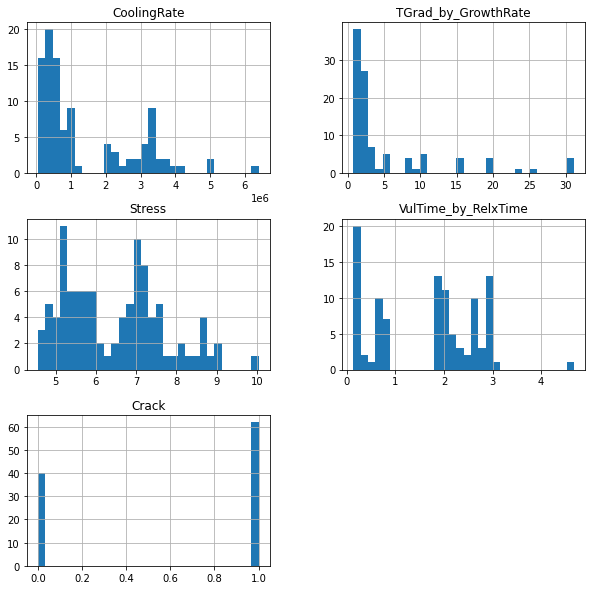

In [ ]:
df.hist(bins = 30, figsize = (10,10))

# Checking the distribution of cracked and non-cracked samples in the dataset

In [ ]:
df['Crack'].value_counts()

1    62
0    40
Name: Crack, dtype: int64

### Checking for any linear correlation between the features

In [ ]:
df.corr()

,CoolingRate,TGrad_by_GrowthRate,Stress,VulTime_by_RelxTime,Crack
CoolingRate,1.000000,-0.385195,0.323340,-0.293658,-0.054268
TGrad_by_GrowthRate,-0.385195,1.000000,-0.371936,-0.464264,-0.077974
Stress,0.323340,-0.371936,1.000000,0.115171,0.398351
VulTime_by_RelxTime,-0.293658,-0.464264,0.115171,1.000000,0.256615
Crack,-0.054268,-0.077974,0.398351,0.256615,1.000000


### Plotting the correlation information through a map

<AxesSubplot:>

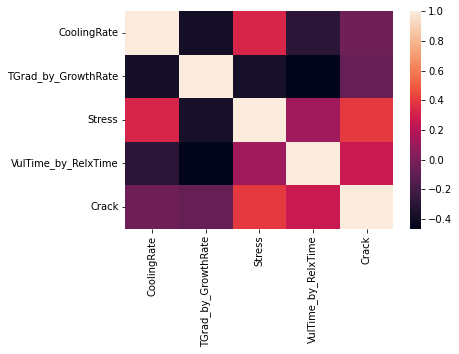

In [ ]:
sns.heatmap(df.corr())

### Plotting pairplots between various features to visually check for any non-linear correlations between the features. Also, colouring the data points based on whether "Crack" state 0 or 1.

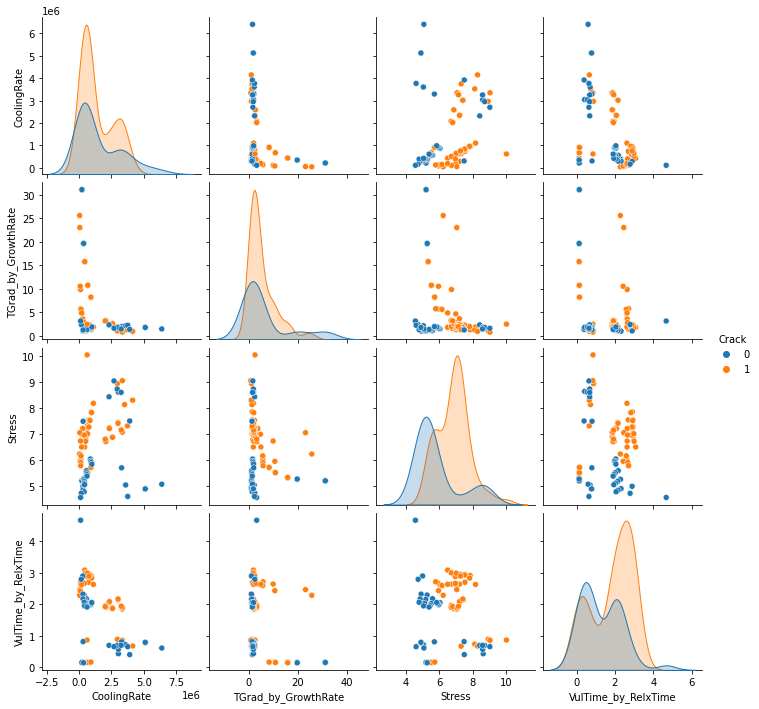

In [ ]:
sns.pairplot(df, hue="Crack")

### Important conclusions from the above
* Various features don't seem to be strongly co-related either linealry or otherwise (Note that 'Crack' is dependent variable, and not a feature
* Particulary interesting are the distribution plots along the diagonal in the above figure, which shows Cracking susceptibilty is strongly dependent on Stress and VulTime_by_RelxTime, while not much dependency is suggested on CoolingRate and TGrad_by_GrowthRate

### Dividing the dataset into features and dependet variable

In [ ]:
X = df.iloc[:, :-1].values # Independent features
y = df.iloc[:, -1].values # Dependet variable (Crack)


In [ ]:
# Note that X, and y are array and not dataframe

X.shape

(102, 4)

In [ ]:
y.shape

(102,)

In [ ]:
# Re-shaping y as a 2D array (which is required for codes based on the scikit-learn library)

y = y.reshape(-1,1)

y.shape

(102, 1)

### Performing train-test split before scaling the features so as to avoid inlcduing bias towards training data in the test dataset

In [ ]:
# Importing the train-test splitter from scikit-learn library

from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train.shape

(76, 4)

In [ ]:
X_test.shape

(26, 4)

In [ ]:
y_train.shape

(76, 1)

### Scaling the data as the orignal features are very different scaled

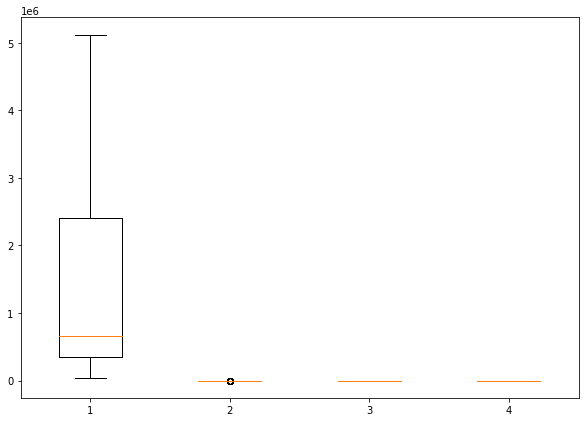

In [ ]:
# Following shows the distribution of the original features through a box-plot
# It is clear that the features are very differently scaled, and if they are
# not scaled to comparable levels, machine learning algorithms won't work
# as efficiently

fig = plt.figure(figsize =(10, 7))
plt.boxplot(X_train)
plt.show()

In [ ]:
# Importing the scaler from scikit-learn library

from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test) # IMP: Test data is just transformed, and not used for fitting the scaler

# Note that the dependent variable y don't need to be scaled as it is already in [0,1] range 


In [ ]:
X_train_scaled

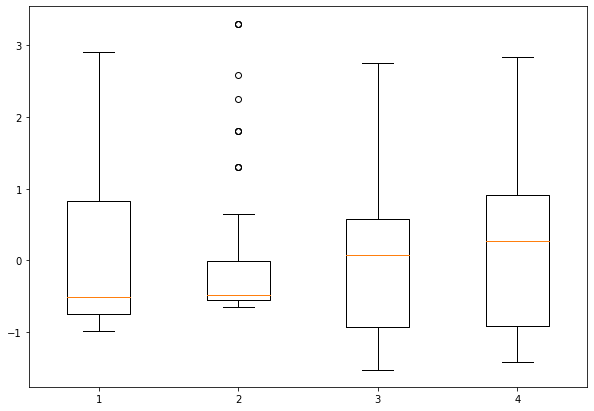

In [ ]:
# Following shows the distribution of the features after scaling 

fig = plt.figure(figsize =(10, 7))
plt.boxplot(X_train_scaled)
plt.show()



---



---



### Classification using

1.   Logistic Regression



In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)




> All 4 features






In [ ]:
classifier.fit(X_train_scaled, y_train)
y_train_predict = classifier.predict(X_train_scaled)
y_test_predict = classifier.predict(X_test_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Including the train-test split command just for reference
```
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
```



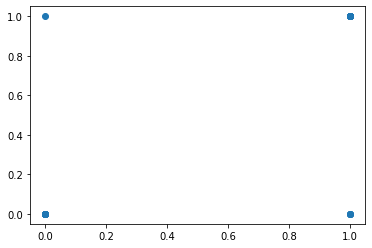

In [ ]:
# Plotting the variation of predicted y with the groundtruth y to see how the model performed
plt.scatter(y_test, y_test_predict) 

Above don't seem to be of any help for classifcation tasks. Above is relevant only for regression tasks

In [ ]:
# For Classification, useful metrics is accuracy_score.

# Importing the relevant modules from the scikit-learn library

from sklearn.metrics import accuracy_score


In [ ]:
print(f'Accuracy for TRAINING data is: {accuracy_score(y_train, y_train_predict)}')
print('\n')
print(f'Accuracy for TEST data is: {accuracy_score(y_test, y_test_predict)}')

Accuracy for TRAINING data is: 0.7236842105263158


Accuracy for TEST data is: 0.8076923076923077




> Using only 2 most important features - Stress, and VulTime_by_RelxTime - This was determined based on pairplot's presented earlier






In [ ]:
classifier.fit(X_train_scaled[:,2:], y_train)
y_train_predict = classifier.predict(X_train_scaled[:,2:])
y_test_predict = classifier.predict(X_test_scaled[:,2:])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(f'Accuracy for TRAINING data is: {accuracy_score(y_train, y_train_predict)}')
print('\n')
print(f'Accuracy for TEST data is: {accuracy_score(y_test, y_test_predict)}')

Accuracy for TRAINING data is: 0.7236842105263158


Accuracy for TEST data is: 0.7307692307692307


### Interesting results

* training accuracy was not affected, while Test accuracy dropped slightly from about 80% to about 73%. 
* Since 73% is still a reaosnably good accuracy, one important implication from this analysis is CoolingRate and TGrad_by_GrowthRate can be avoided while planning for experimental measurements/numerical simulations saving time and resources.
* Using just 2 features for classification tasks also allow us to visualize the results through 2D plots



### For the present study, for comparing the present results with other Classification algorithms, all 4 features (Stress, and VulTime_by_RelxTime) will be used

2.   K-nearest neighbours



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_scaled, y_train)

y_train_predict = classifier.predict(X_train_scaled)
y_test_predict = classifier.predict(X_test_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(f'Accuracy for TRAINING data is: {accuracy_score(y_train, y_train_predict)}')
print('\n')
print(f'Accuracy for TEST data is: {accuracy_score(y_test, y_test_predict)}')

Accuracy for TRAINING data is: 0.9605263157894737


Accuracy for TEST data is: 0.9615384615384616


3.   Kernel SVM

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_scaled, y_train)

y_train_predict = classifier.predict(X_train_scaled)
y_test_predict = classifier.predict(X_test_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(f'Accuracy for TRAINING data is: {accuracy_score(y_train, y_train_predict)}')
print('\n')
print(f'Accuracy for TEST data is: {accuracy_score(y_test, y_test_predict)}')

Accuracy for TRAINING data is: 0.8947368421052632


Accuracy for TEST data is: 0.9230769230769231


4. Navie Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train_scaled, y_train)

y_train_predict = classifier.predict(X_train_scaled)
y_test_predict = classifier.predict(X_test_scaled)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(f'Accuracy for TRAINING data is: {accuracy_score(y_train, y_train_predict)}')
print('\n')
print(f'Accuracy for TEST data is: {accuracy_score(y_test, y_test_predict)}')

Accuracy for TRAINING data is: 0.6447368421052632


Accuracy for TEST data is: 0.6923076923076923


### Conclusion


* The original study referred to in the first cell used a decision tree, support vector machines, and logistic regression for this classification problem and reported an accuracy of 85.3%, 90.2%, and 70%, respectively.


* Our logistic regression model, with an accuracy of 72% and 80% for training and test data, respectively, clearly outperformed the logistic regression model of the original study.


* We are getting the best accuracy of about 96% on both training and test data using the K-nearest neighbour classifier, and this would be the best technique for this type of analysis going forward.